# 600_Analysis_Q3A

# _Question Three: Does Location Impact Road Safety?_

## _(A): Is it safer to drive in urban or rural areas?_


## Purpose
In this notebook we will explore whether or not location impacts road safety. In particular, we will compare accidents in rural and urban areas and see if one is safer than the other. 

To do this, we will look at the number of accidents in urban and rural areas, accident severity and number of casualties.

## Notebook Contents:
* __1:__ Loading our Datasets
   
* __2:__ The range of years that we will be using for this research question.

* __3:__ Are there more accidents in rural or urban areas?

* __4:__ Are accidents more or less severe in urban or rural areas?
      
* __5:__ On average, are there more casualties in accidents in urban or rural areas?
    
* __6:__ Saving Data to a Pickle File

* __7:__ Creating Data Dictionaries

## Datasets
__Input:__
* 900_Q3A_final_prep_1.pkl    (Data needed for Q3A for years 1979-2004)
* 900_Q3A_final_prep_2.pkl    (Data needed for Q3A for years 2005-2014)


__Output:__ 
* 600_Analysis_Q3A_norm_urban_rural_groups.pkl   (Data for urban and rural groups)
* 600_Analysis_Q3A_norm_All_Urban_Rural_Accident_Severity_groups.pkl   (Accident severity in urban and rural groups)
* 600_Analysis_Q3A_All_Urban_Rural_Num_Casualties.pkl   (Average number of casualties in urban and rural areas)

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

# 1. Loading the Datasets

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in separate pickle files, we will read in these cleaned datasets for the purpose of answering this research question.

In [2]:
Q3A_1 = pd.read_pickle('../../data/processed/900_Q3A_final_prep_1.pkl')
Q3A_1.shape

(2290760, 19)

In [3]:
Q3A_2 = pd.read_pickle('../../data/processed/900_Q3A_final_prep_2.pkl')
Q3A_2.shape

(2810328, 19)

# 2. The range of years that we will be using for this research question
Below you can see the first two rows of the first dataset and the last two rows of the third and final dataset. By looking at the 'Date' column you can see that the data ranges from 1999 - 2014.

In [4]:
Q3A_1.head(2)

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Speed_limit,Junction_Detail,Urban_or_Rural_Area,Vehicle_Type,Vehicle_Location-Restricted_Lane,Sex_of_Driver,Date_Day,Month,Year
8521268,1999010SU0945,-0.271752,51.715661,slight,1,1,25/12/1999,sunday,09:30,33,70,slip road,rural,car,On main carriageway - not in restricted lane,female,25,12,1999
8521269,1999010SU0946,-0.239977,51.695136,slight,2,1,17/12/1999,saturday,18:38,33,70,not at junction or within 20 metres,rural,goods 7.5 tonnes mgw and over,On main carriageway - not in restricted lane,male,17,12,1999


In [5]:
Q3A_2.tail(2)

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Speed_limit,Junction_Detail,Vehicle_Type,Urban_or_Rural_Area,Vehicle_Location-Restricted_Lane,Sex_of_Driver,Date_Day,Month,Year
3004423,2014984139614,-3.348426,55.1067,slight,2,2,24/12/2014,thursday,15:00,917,60,T or staggered junction,bus or coach,rural,On main carriageway - not in restricted lane,male,24,12,2014
3004424,2014984139614,-3.348426,55.1067,slight,2,2,24/12/2014,thursday,15:00,917,60,T or staggered junction,car,rural,On main carriageway - not in restricted lane,male,24,12,2014


# 3. Are there more accidents in rural or urban areas?
Firstly, we will look at whether there are a greater number of road accidents in rural or urban areas. In order to be able to answer this we will use the 'Urban_or_Rural_Area' column which tells you if the road accident occurred in an urban or rural area.

### Groupby
We will group the data by the 'Urban_or_Rural_Area' column and then count the number of accidents in each group.

#### Q3A_1

In [6]:
urban_rural_1 = Q3A_1.groupby('Urban_or_Rural_Area')[['Accident_Index']].count()
urban_rural_1

,Accident_Index
Urban_or_Rural_Area,
rural,836111
urban,1454649


#### Q3A_2

In [7]:
urban_rural_2 = Q3A_2.groupby('Urban_or_Rural_Area')[['Accident_Index']].count()
urban_rural_2

,Accident_Index
Urban_or_Rural_Area,
rural,1040909
urban,1769419


### Aggregate Results
Below we will create a new dataframe containing the number of accidents which have occurred in urban and rural areas for both of our datasets. 

We will also rename the 'Accident_Index' column to 'Accident_Count' as the column contains the number of accidents for each vehicle age (calculated in above cells).

Finally, we will then group the data by the 'Urban_or_Rural_Area' and sum the 'Accident_Count' for each group to give the total number of accidents in both urban and rural areas.

In [8]:
urban_rural_groups = pd.concat([urban_rural_1, urban_rural_2])
urban_rural_groups = urban_rural_groups.rename(columns={'Accident_Index': 'Accident_Count'})
urban_rural_groups.head()

,Accident_Count
Urban_or_Rural_Area,
rural,836111
urban,1454649
rural,1040909
urban,1769419


In [9]:
urban_rural_groups = urban_rural_groups.groupby(level=0).sum()
urban_rural_groups

,Accident_Count
Urban_or_Rural_Area,
rural,1877020
urban,3224068


In the graph below you can see that there are more road accidents in urban areas than rural areas.

Text(0.5,0,'Urban or Rural Area')

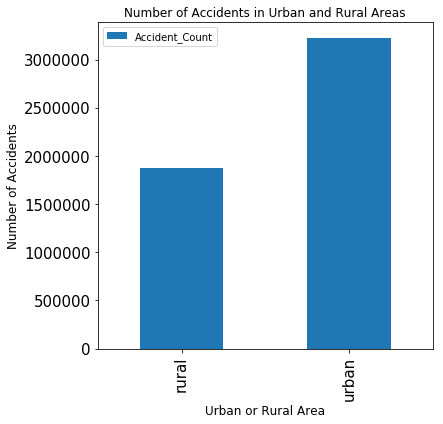

In [10]:
urban_rural_groups.plot(kind='bar', title='Number of Accidents in Urban and Rural Areas', figsize=(6,6), fontsize=15)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Urban or Rural Area', fontsize=12)

### Normalise
Next, we will normalise the data by the number of accidents by dividing each row in the 'Accident_Count' column by the total sum of data in the 'Accident_Count' column (i.e.): divide the number of accidents in urban and rural areas by the total number of accidents. 

It will return a % value for the number of accidents in urban and rural areas.

In [11]:
norm_urban_rural_groups = urban_rural_groups.copy() # create a daraframe as copy of original

In [12]:
norm_urban_rural_groups['Accident_Count'] = 100*(norm_urban_rural_groups['Accident_Count'])/norm_urban_rural_groups['Accident_Count'].sum()
norm_urban_rural_groups

,Accident_Count
Urban_or_Rural_Area,
rural,36.796464
urban,63.203536


Below we can see that there are more road accidents in urban areas.

Text(0.5,0,'Urban or Rural Area')

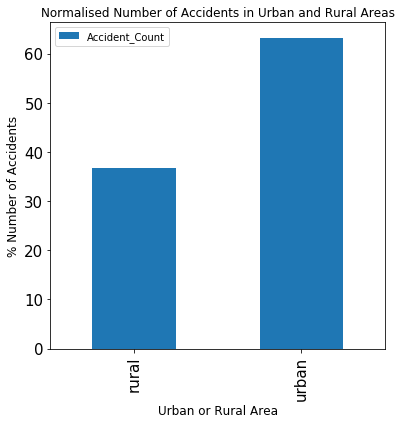

In [13]:
norm_urban_rural_groups.plot(kind='bar', title='Normalised Number of Accidents in Urban and Rural Areas', figsize=(6,6), fontsize=15)
plt.ylabel('% Number of Accidents', fontsize=12)
plt.xlabel('Urban or Rural Area', fontsize=12)

Next, we will look at the accidents in urban and rural areas separately.

# 4. Are accidents more or less severe in urban or rural areas?
After looking at the number of accidents in urban and rural areas we were intrigued to see whether nor not accidents are more or less severe in one than the other.

### Groupby

Firstly, we will group the data by the 'Urban_or_Rural_Area' and 'Accident_Severity' columns. 

_Note:_ The 'Urban_or_Rural_Area' column tells you if the accident happened in an urban or rural area and  the 'Accident_Severity' tells you if  the severity of the accident was fatal, serious or slight.

We will then count the number of accidents for each group by using the 'Accident_Index' column. Each row in the 'Accident_Index' represents an accident. Therefore, by counting the number of rows in this column for each year we will get the number of accidents for each group.

#### Q3A_1

In [14]:
Urban_Rural_Accident_Severity_1_groups = Q3A_1.groupby(['Urban_or_Rural_Area','Accident_Severity'])['Accident_Index'].count().unstack()
Urban_Rural_Accident_Severity_1_groups

Accident_Severity,fatal,serious,slight
Urban_or_Rural_Area,,,
rural,21970,134728,679413
urban,9760,155571,1289318


#### Q3A_2

In [15]:
Urban_Rural_Accident_Severity_2_groups = Q3A_2.groupby(['Urban_or_Rural_Area','Accident_Severity'])['Accident_Index'].count().unstack()
Urban_Rural_Accident_Severity_2_groups

Accident_Severity,fatal,serious,slight
Urban_or_Rural_Area,,,
rural,25566,158744,856599
urban,10915,191632,1566872


### Aggregate Results

Below we will create a new dataframe containing the number of accidents for each severity in urban and rural areas for both of the datasets. 

We will do this by concatenating the 2 dataframes and grouping the data by 'Urban_or_Rural_Area' and sum the values for each group to get the total count of accidents for each severity in each area.

In [16]:
All_Urban_Rural_Accident_Severity_groups = pd.concat([Urban_Rural_Accident_Severity_1_groups, Urban_Rural_Accident_Severity_2_groups]).groupby(level=0).sum()
All_Urban_Rural_Accident_Severity_groups

Accident_Severity,fatal,serious,slight
Urban_or_Rural_Area,,,
rural,47536,293472,1536012
urban,20675,347203,2856190


### Normalise
Next, we will normalise the data by the accident severity. We will do this by dividing each column by the total sum of data in all columns for each row in the dataframe. We will multiply each value in each row by 100 to give a % of fatal, serious and slight accidents for each row.

In [17]:
# create a dataframe as copy of orignal
norm_All_Urban_Rural_Accident_Severity_groups = All_Urban_Rural_Accident_Severity_groups.copy()

In [18]:
# define columns to normalise
cols = norm_All_Urban_Rural_Accident_Severity_groups.columns

In [19]:
# calculate the sum of each row
sum_rows = norm_All_Urban_Rural_Accident_Severity_groups[cols].sum(axis=1)

In [20]:
# divide each column in each row by the total sum of the row
norm_All_Urban_Rural_Accident_Severity_groups[cols] = norm_All_Urban_Rural_Accident_Severity_groups[cols].div(sum_rows, axis=0)

In [21]:
# multiply normalised dara by 100 to get a %
percentage_norm_All_Urban_Rural_Accident_Severity_groups = 100*norm_All_Urban_Rural_Accident_Severity_groups[cols]
percentage_norm_All_Urban_Rural_Accident_Severity_groups

Accident_Severity,fatal,serious,slight
Urban_or_Rural_Area,,,
rural,2.532525,15.634996,81.832479
urban,0.641271,10.769097,88.589633


In the graph below you can see that both urban and rural area have a much higher amount of slightly severe accidents in comparison to the other levels of severity. 

While urban areas have a higher number of slightly severe accidents in comparison to rural areas, rural areas have more serious and fatal accidents.

Text(0.5,0,'% Number of Accidents')

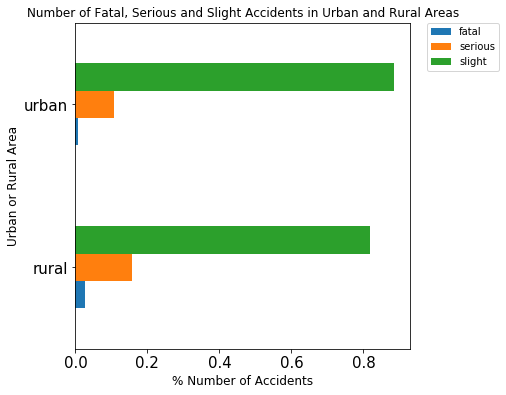

In [22]:
norm_All_Urban_Rural_Accident_Severity_groups.plot(kind='barh', title='Number of Fatal, Serious and Slight Accidents in Urban and Rural Areas', figsize=(6,6), fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Urban or Rural Area', fontsize=12)
plt.xlabel('% Number of Accidents', fontsize=12)

# 5. On average, are there more casualties in accidents in urban or rural areas?

Next, we will analyse the data to determine whether or not there are a higher number of casualties in accidents in urban or rural areas. In order to determine this we will look at the average number of accidents in both urban and rural areas.

### Groupby
* Firstly, we will group the data by the 'Urban_or_Rural_Area' column which tells us whether the accident happened in an urban or rural area.

* We will then get the average number of casualties in an accident for each area by using the 'Number_of_Casualties' column which gives the data on the number of casualties in each accident.

#### Q3A_1

In [23]:
Urban_Rural_Num_Casualties_a = Q3A_1.groupby('Urban_or_Rural_Area')[['Number_of_Casualties']].mean()
Urban_Rural_Num_Casualties_a

,Number_of_Casualties
Urban_or_Rural_Area,
rural,1.616796
urban,1.354378


#### Q3A_2

In [24]:
Urban_Rural_Num_Casualties_b = Q3A_2.groupby('Urban_or_Rural_Area')[['Number_of_Casualties']].mean()
Urban_Rural_Num_Casualties_b

,Number_of_Casualties
Urban_or_Rural_Area,
rural,1.599105
urban,1.346526


### Aggregate Results

* Below we will create a new dataframe containing the average number of casualties in both urban and rural areas for both of the dataframes created above.

* Both of these  dataframes contains the average number of casualties for each area (urban/rural).

* After this we will group this new dataframe by the 'Urban_or_Rural_Area' and sum the values in each group to give us the total 'Number_of_Casualties' in both urban and rural areas.

* Finally, we will divde each group by 2 as there are two dataframes being contatenated. This will give us the "mean of means" to get the overall mean for each area.

In [25]:
All_Urban_Rural_Num_Casualties = pd.concat([Urban_Rural_Num_Casualties_a, Urban_Rural_Num_Casualties_b])
All_Urban_Rural_Num_Casualties

,Number_of_Casualties
Urban_or_Rural_Area,
rural,1.616796
urban,1.354378
rural,1.599105
urban,1.346526


In [26]:
All_Urban_Rural_Num_Casualties = All_Urban_Rural_Num_Casualties.groupby(level=0).sum()/2   # mean of means
All_Urban_Rural_Num_Casualties

,Number_of_Casualties
Urban_or_Rural_Area,
rural,1.607951
urban,1.350452


From the plot below you can see that on average there are a greater number of casualties in road accidents in rural areas.

Text(0.5,0,'Average Number of Casualties')

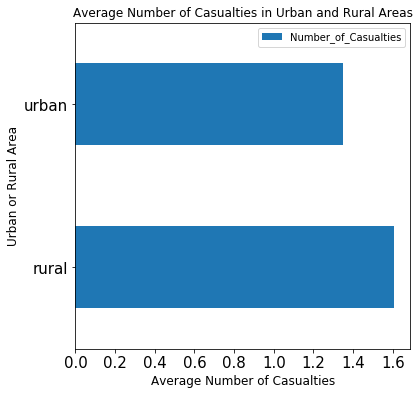

In [27]:
All_Urban_Rural_Num_Casualties.plot(kind='barh', title='Average Number of Casualties in Urban and Rural Areas', figsize=(6,6), fontsize=15)
plt.ylabel('Urban or Rural Area', fontsize=12)
plt.xlabel('Average Number of Casualties', fontsize=12)

# 6. Saving Data to a Pickle File
Here we will save the dataframes needed for our results into a pickle file.

In [28]:
pickle_save_time = %timeit -o norm_urban_rural_groups.to_pickle("../../data/analysis/600_Analysis_Q3A_norm_urban_rural_groups.pkl")

pickle_save_time

5.49 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.49 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [29]:
pickle_save_time = %timeit -o norm_All_Urban_Rural_Accident_Severity_groups.to_pickle("../../data/analysis/600_Analysis_Q3A_norm_All_Urban_Rural_Accident_Severity_groups.pkl")

pickle_save_time

5.67 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.67 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [30]:
pickle_save_time = %timeit -o All_Urban_Rural_Num_Casualties.to_pickle("../../data/analysis/600_Analysis_Q3A_All_Urban_Rural_Num_Casualties.pkl")

pickle_save_time

5.54 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.54 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

# 7. Creating Data Dictionaries
Finally, we will create a data dictionary for each pickle file.

In [31]:
data_dictionary.save(
    '../../data/analysis/600_Analysis_Q3A_norm_urban_rural_groups.pkl', 

"""\
Aggregate raw data for urban rural groups.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Count,2.0,50.0,18.67262,36.796464,43.398232,50.0,56.601768,63.203536,0,0.0


In [32]:
data_dictionary.save(
    '../../data/analysis/600_Analysis_Q3A_norm_All_Urban_Rural_Accident_Severity_groups.pkl', 

"""\
Aggregate raw data for accident severity in urban and rural groups.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,2.0,0.015869,0.013373,0.006413,0.011141,0.015869,0.020597,0.025325,0,0.0
serious,2.0,0.132020,0.034407,0.107691,0.119856,0.132020,0.144185,0.156350,0,0.0
slight,2.0,0.852111,0.047780,0.818325,0.835218,0.852111,0.869003,0.885896,0,0.0


In [33]:
data_dictionary.save(
    '../../data/analysis/600_Analysis_Q3A_All_Urban_Rural_Num_Casualties.pkl', 

"""\
Aggregate raw data for average number of casualties in urban and rural areas.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Number_of_Casualties,2.0,1.479201,0.182079,1.350452,1.414827,1.479201,1.543576,1.607951,0,0.0
